In [138]:
import numpy as np

In [140]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [332]:
def local_regression(x, X, t, tau):
    x_ext = np.r_[1, x]
    w = local_regression_coeffs(x, X, t, tau)
    return x_ext @ w

In [333]:
def local_regression_coeffs(x, X, t, tau):
    psi = diag_kernel(x, X, tau)
    X_ext = np.c_[np.ones(len(X)), X]
    return np.linalg.pinv((X_ext.T @ psi) @ X_ext) @ X_ext.T @ psi @ t

Funzione kernel

In [334]:
def kernel(x,xi,tau):
    return np.exp(np.sum((xi - x) ** 2, axis=1) / (-2 * tau * tau))

Funzione che restituisce la matrice diagonale $\Psi$ dei valori kernel tra $x$ e tutti gli elementi nel training set

In [335]:
def diag_kernel(x, X, tau):
    return np.diag(kernel(X,x,tau))

Genera dataset secondo la funzione $\log(|x^2-1|+.5)$ con rumore additivo gaussiano

In [336]:
n = 1000
X = np.linspace(-3, 3, num=n)
t = np.log(np.abs(X ** 2 - 1) + .5)

X += np.random.normal(scale=.1, size=n)
X = X.reshape(-1,1)

Fissa valore della varianza del kernel

In [356]:
tau = .05

Regressione in un punto $x$

In [357]:
x = -0.03

# calcola matrice kernel
psi = diag_kernel(np.array([x]).reshape(-1,1),X,tau)
domain = np.linspace(-3, 3, num=300)

Visualizza valori del kernel

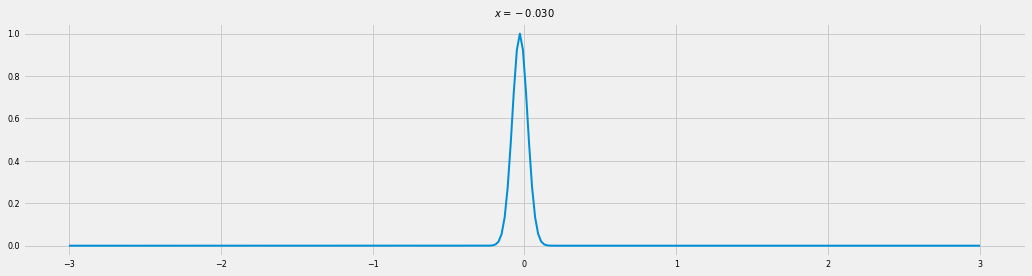

In [364]:
f = plt.figure(figsize=(16,4))
plt.title('$x={0:5.3f}$'.format(x))
plt.plot(domain, kernel(x,domain.reshape(-1,1),tau), c=colors[0])
plt.show()

Calcola i coefficienti della regressione locale a $x$

In [365]:
y = local_regression(x, X, t, tau)
w = local_regression_coeffs(x, X, t, tau)

Plot retta di regressione a $x$

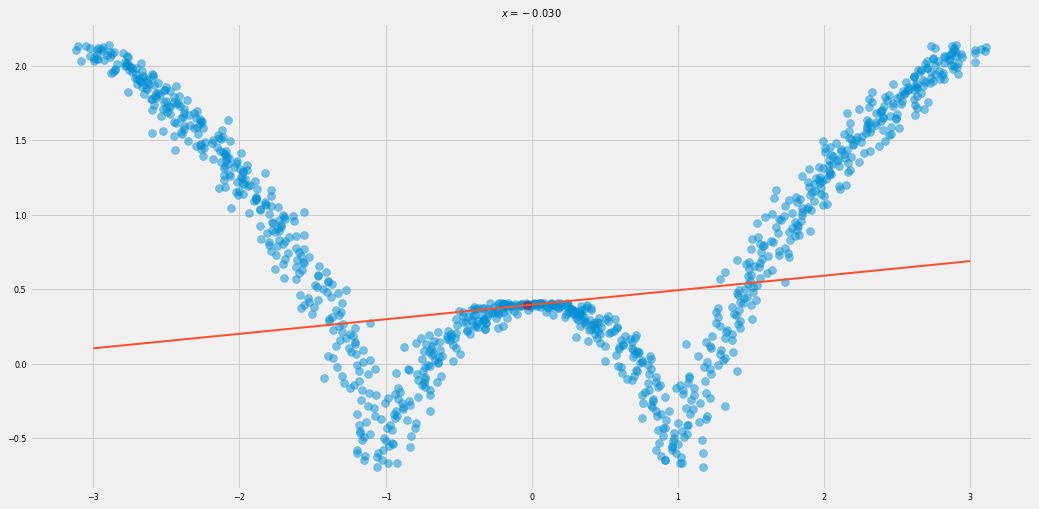

In [366]:
f = plt.figure(figsize=(16,8))
plt.title('$x={0:5.3f}$'.format(x))
plt.scatter(X, t, c= colors[0], alpha=.5)
plt.plot([x], [y], marker='o', color=colors[7], alpha=.5)
plt.plot(domain, np.c_[np.ones(len(domain)), domain] @ w, color=colors[1])
plt.show()

Calcola predizioni su tutti i punti considerati

In [367]:
prediction = [local_regression(x, X, t, tau) for x in domain]

Visualizza valori predetti

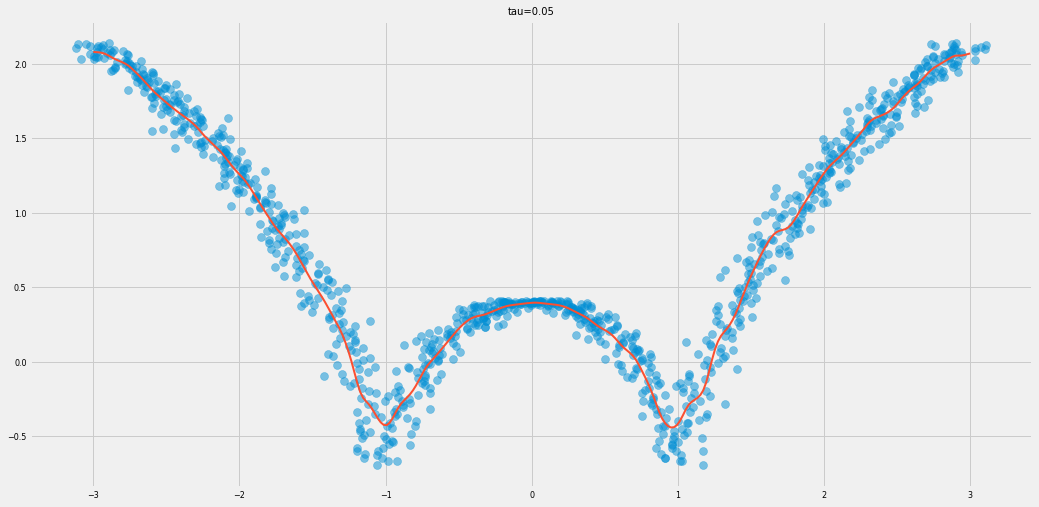

In [368]:
f = plt.figure(figsize=(16,8))
plt.title('tau=%g' % tau)
plt.scatter(X, t, c= colors[0], alpha=.5)
plt.plot(domain, prediction, lw=2, c=colors[1])
plt.show()